### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Boxplot
    - Pairplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
1. [Step 6: Building a Multiple Linear Regression Model](#6)
   - RFE
   - Backward Selection
   - pvalue
   - VIF
1. [Step 7: Assumption Testing](#7)
   - [Test of Normality of Residuals](#10): 
     - Histogram Plot
     - Anderson Darling Test
     - Shapiro-Wilk Test
     - Q-Q Plot
   - [Homoscedasticity of Residuals](#11): 
     - Residual Plot
     - Breusch-Pagan test
   - [Test of Linearity](#12): 
     - Scatter Plot
     - Ramsey Reset Test
   - [Multicollinearity](#13): 
     - VIF Test
     - HeatMap
     - Correlation Matrix
1. [Step 8: Making Predictions Using the Final Model](#8)
1. [Step 9: Model Evaluation](#9)

<a id="1"></a> <br>
# Step 1 : Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Local file path. Please change the file path accordingly

path = 'C:/Users/Khyaati/Desktop/Sem 4/SM/SM Project/'
file = path + 'CarPrice_Assignment.csv'
file1 = path+ 'Data Dictionary - carprices.xlsx'

In [3]:
# Reading the automobile consulting company file on which analysis needs to be done

df_auto = pd.read_csv(file)

df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [4]:
# Reading the data dictionary file

df_stru = pd.read_excel(file1)
df_stru.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN,nan,NaN
1,nan,nan,nan,nan,nan,nan,DATA DICTONARY,NaN,nan,nan,nan,NaN,nan,NaN


In [5]:
# shape of the data
df_auto.shape

(205, 26)

In [6]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# description of the data
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


<a id="2"></a> <br>
# Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [8]:
# dropping car_ID based on business knowledge

df_auto = df_auto.drop('car_ID',axis=1)

In [9]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

price        0.0000
carheight    0.0000
CarName      0.0000
fueltype     0.0000
aspiration   0.0000
dtype: float64

In [10]:
# Datatypes
df_auto.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

(205, 25)

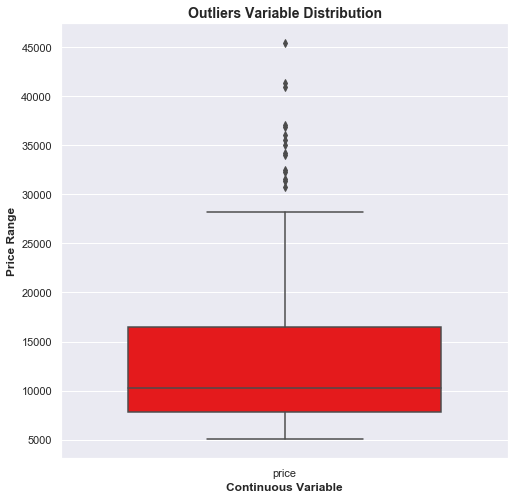

In [11]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape

Insights:
There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [12]:
# Extracting Car Company from the CarName as per direction in Problem 

df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [13]:
# Unique Car company

df_auto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Typo Error in Car Company name

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [14]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [15]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)

In [16]:
# checking for duplicates

df_auto.loc[df_auto.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [17]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

<a id="3"></a> <br>
# Step 3: Visualising the Data

Text(0, 0.5, 'Count of Cars')

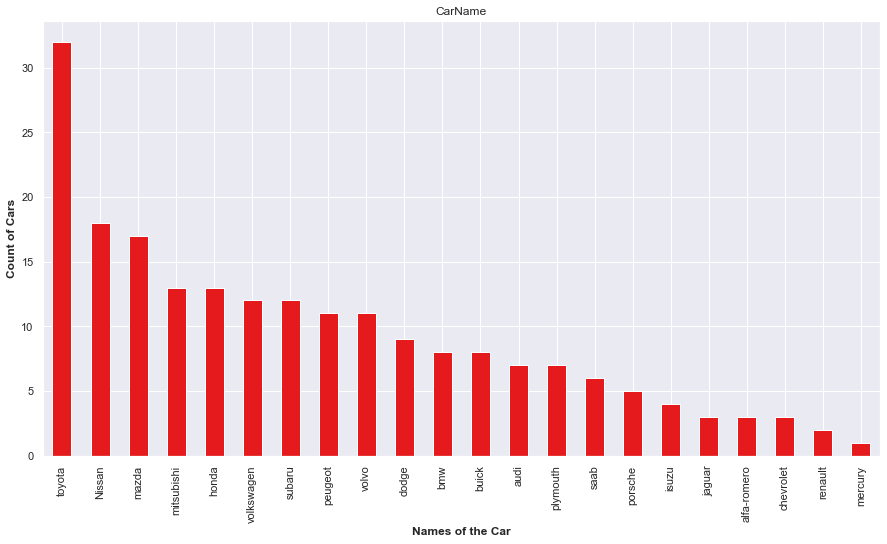

In [18]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

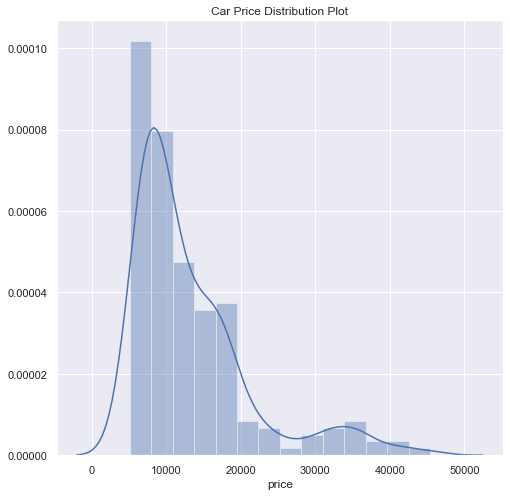

In [19]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])

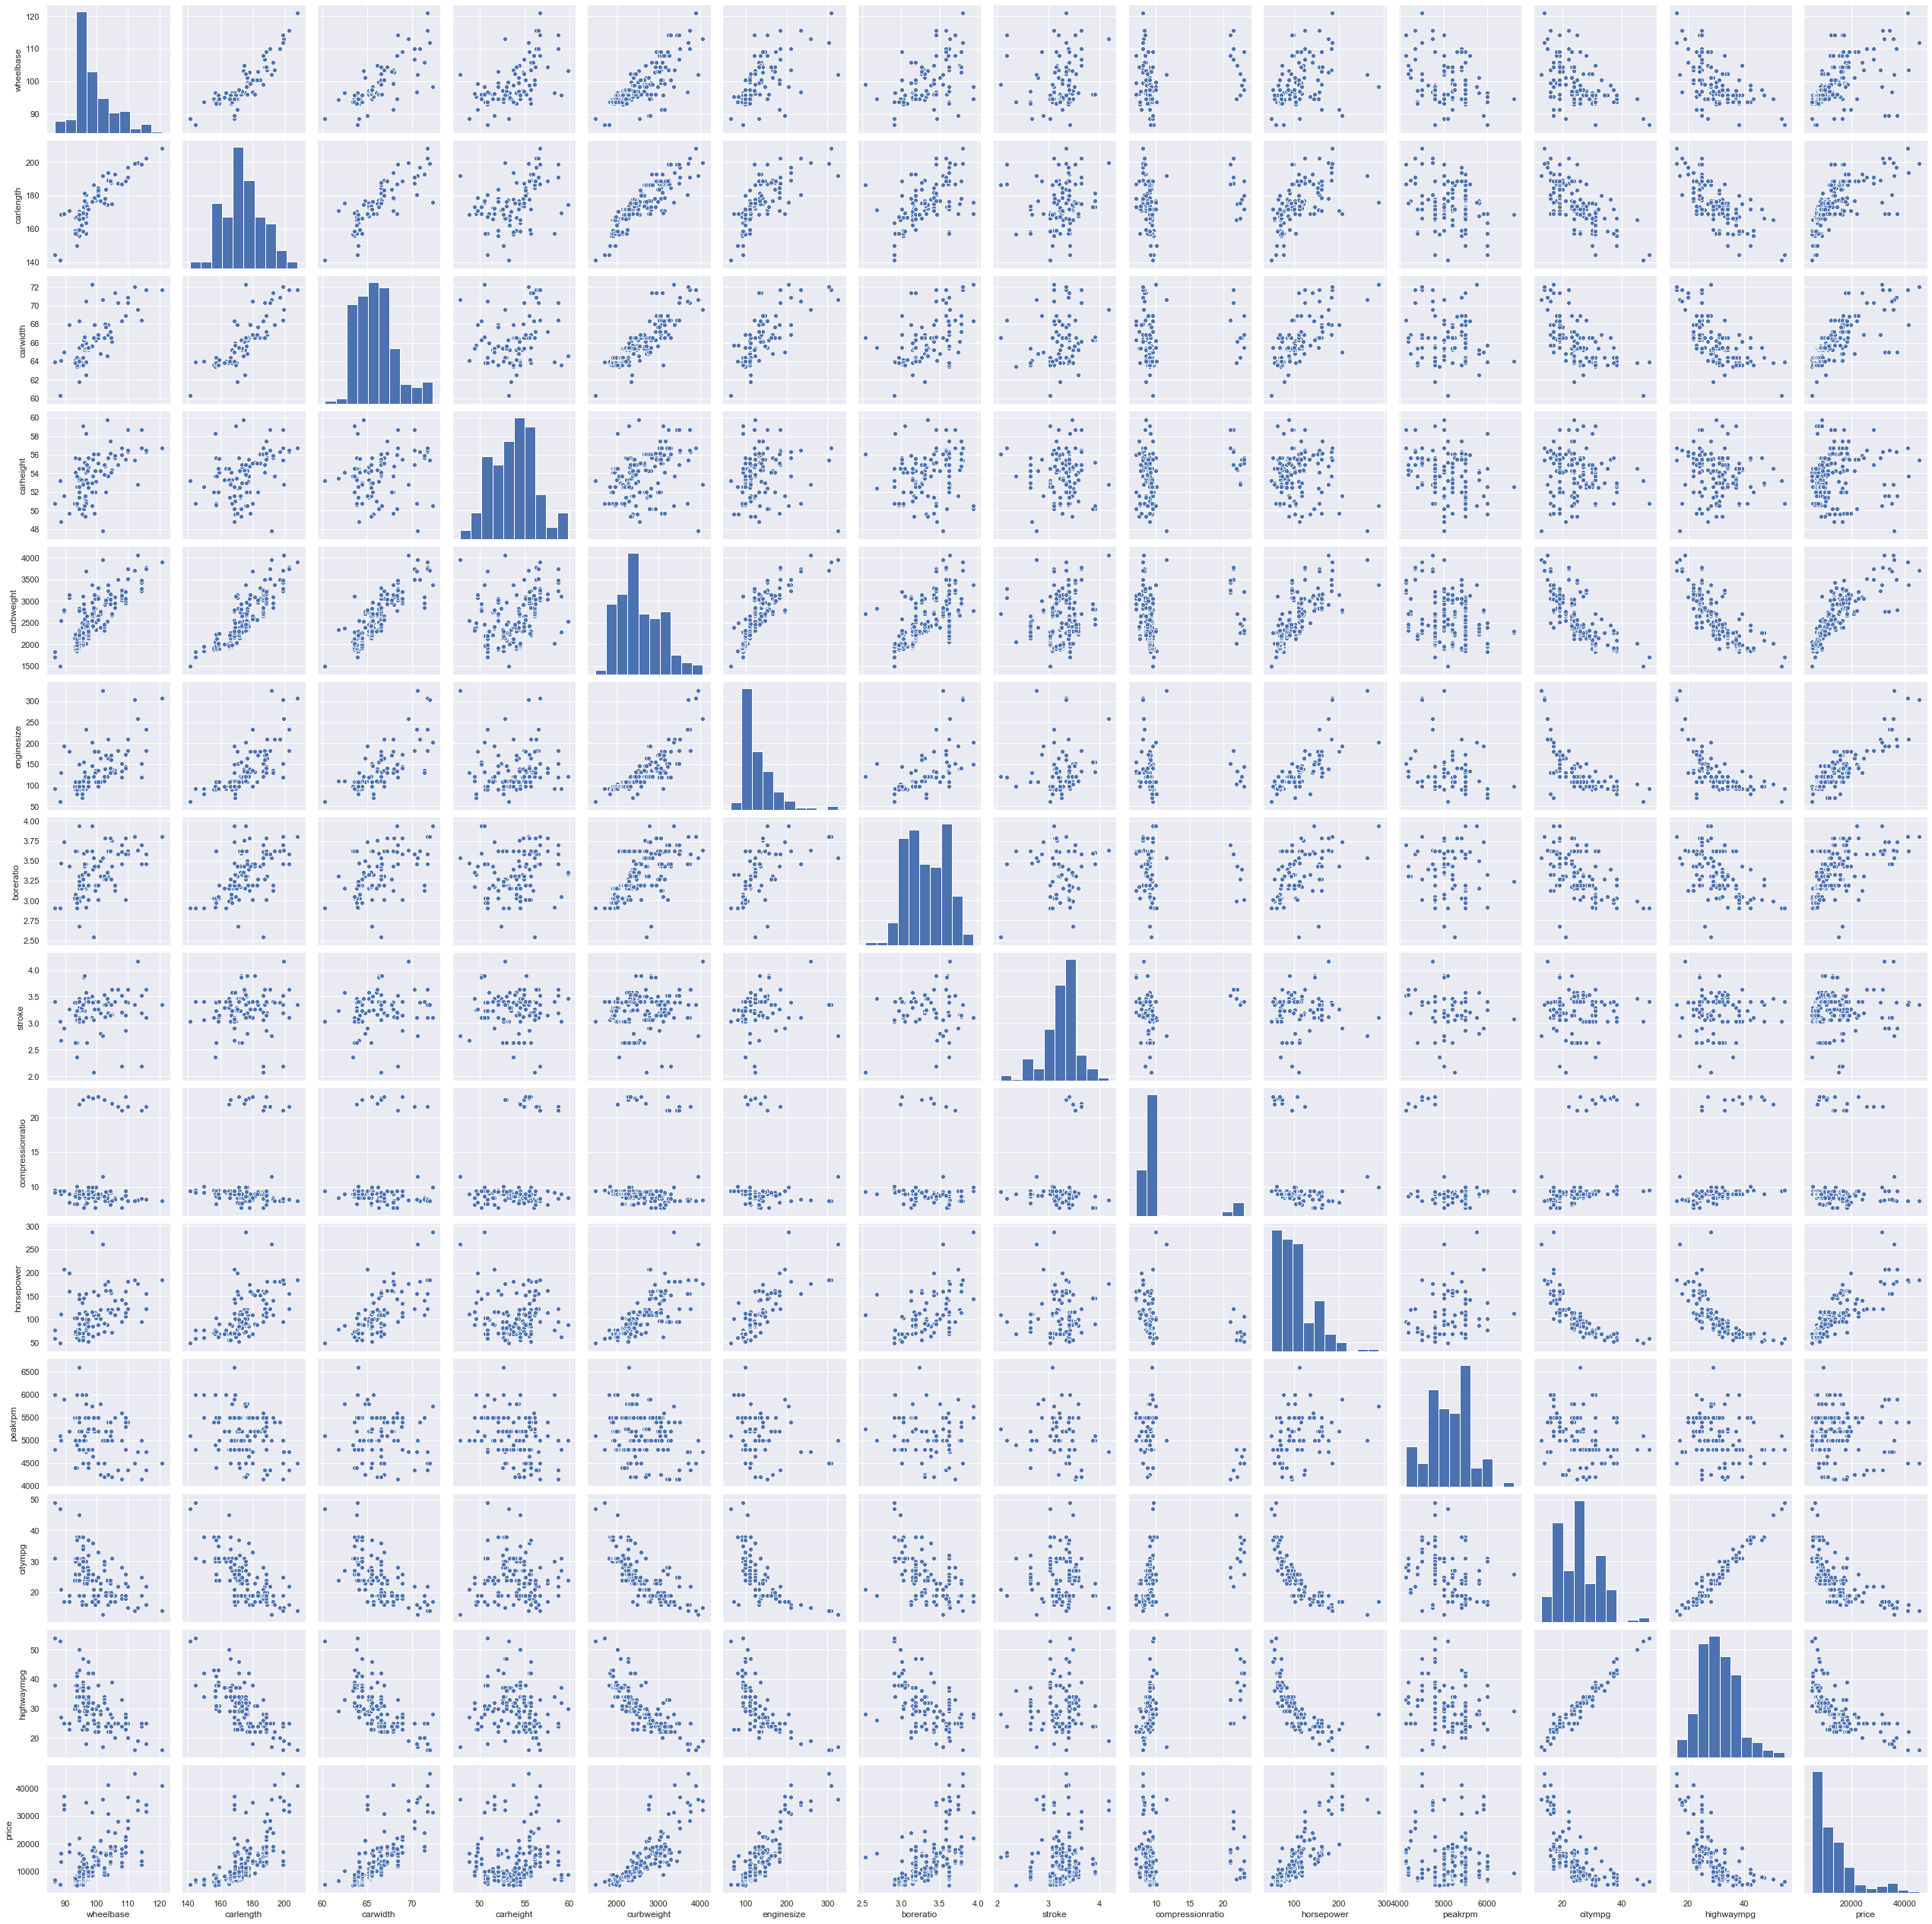

In [20]:
ax = sns.pairplot(df_auto[num_col])

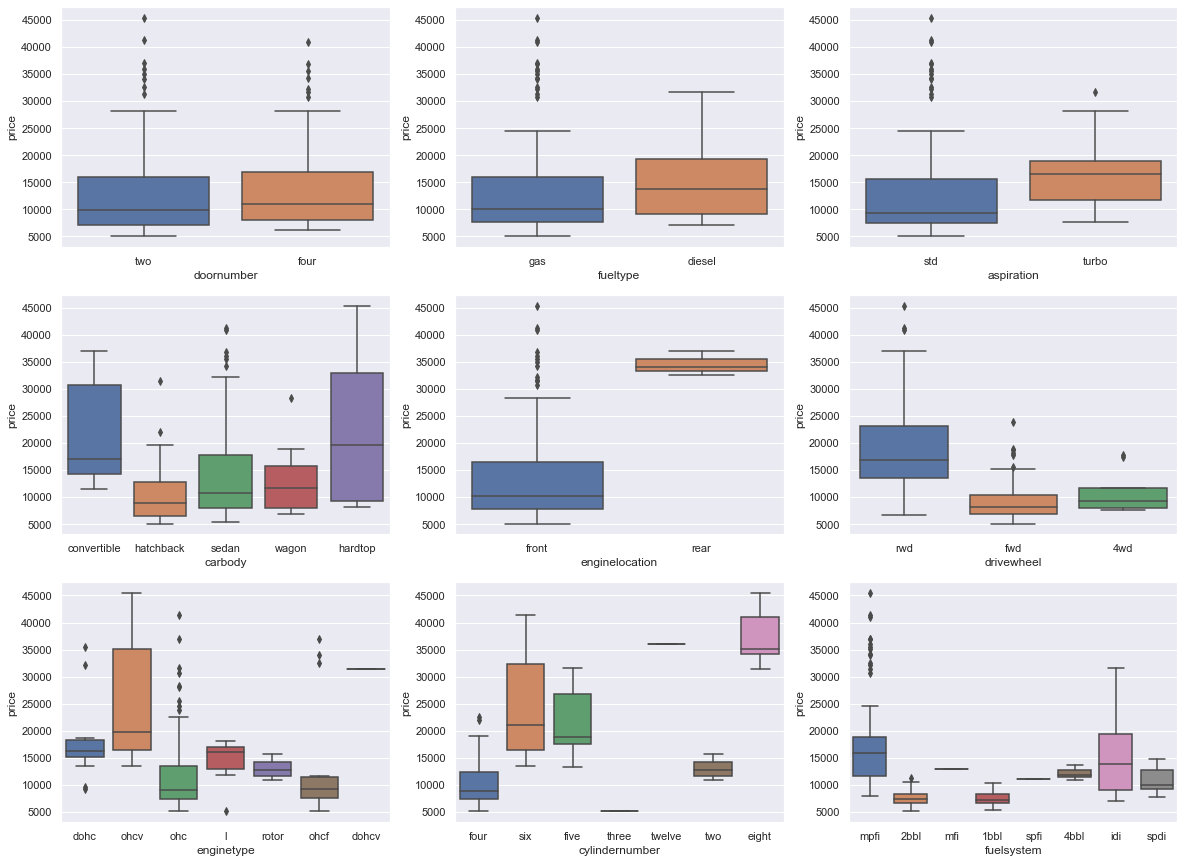

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

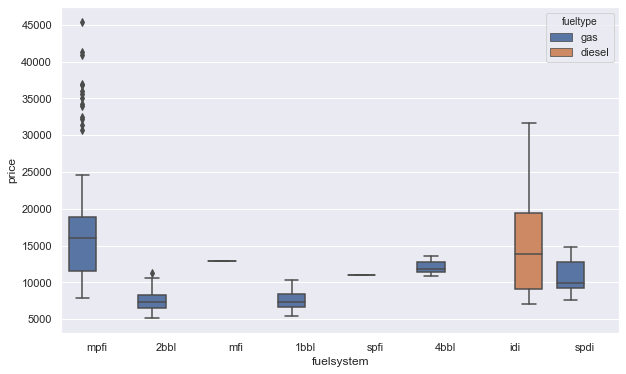

In [22]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()

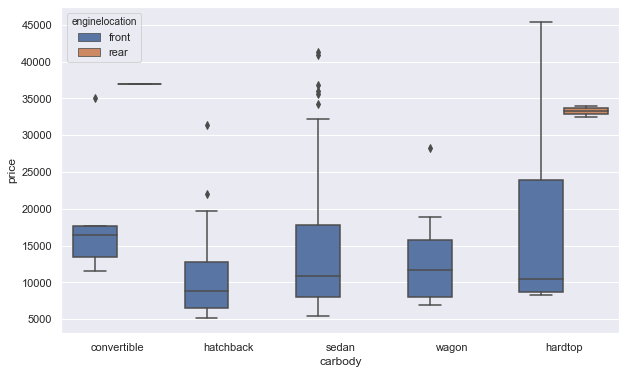

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df_auto)
plt.show()

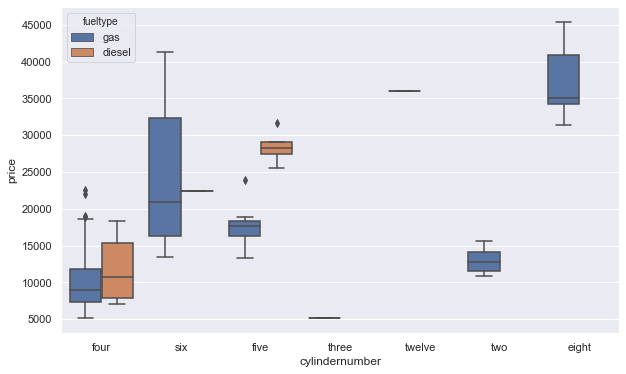

In [24]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()

<Figure size 1440x432 with 0 Axes>

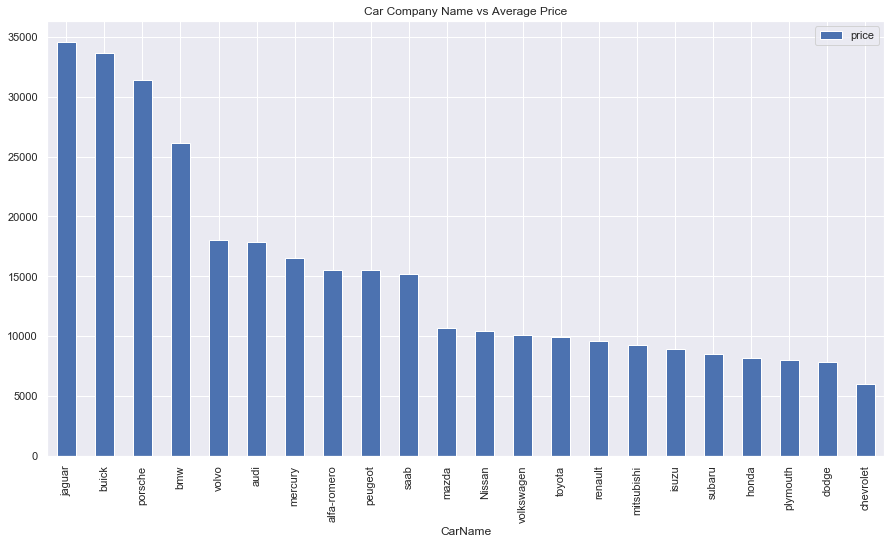

In [25]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 1440x432 with 0 Axes>

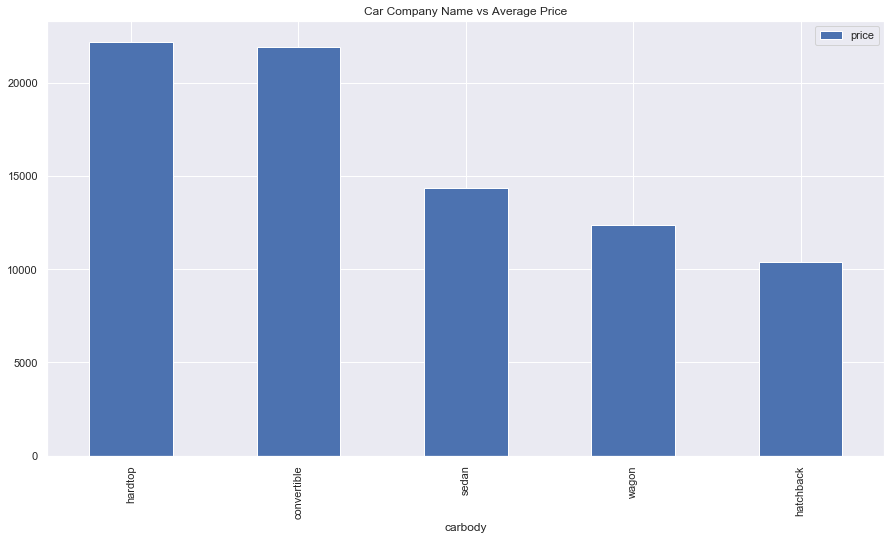

In [26]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df_auto.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [27]:
#Binning the Car Companies based on avg prices of each car Company.

df_auto['price'] = df_auto['price'].astype('int')
df_auto_temp = df_auto.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_auto['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


In [28]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [29]:
df_auto = df_auto[sig_col]

<a id="4"></a> <br>
# Step 4: Data Preparation

In [30]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [31]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df_auto[sig_cat_col])
dummies.shape

(205, 29)

In [32]:
dummies = pd.get_dummies(df_auto[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [33]:
# Add the results to the original dataframe

df_auto = pd.concat([df_auto, dummies], axis = 1)

In [34]:
# Drop the original cat variables as dummies are already created

df_auto.drop( sig_cat_col, axis = 1, inplace = True)
df_auto.shape

(205, 32)

<a id="5"></a> <br>
# Step 5: Splitting the dataset into Training Set and Test Set

In [35]:
df_auto

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
201,19045,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
202,21485,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
203,22470,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7000,2191,98,2.9700,68,31,38,167.3000,63.8000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018,94.5000,2778,151,3.9400,143,19,27,168.9000,68.3000,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538,94.5000,2300,98,3.2400,112,26,29,168.7000,64.0000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950,104.3000,3157,130,3.6200,162,17,22,188.8000,67.2000,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [38]:
scaler = preprocessing.StandardScaler()

In [39]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [40]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [41]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.7002,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.1519,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.4522,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.4426,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.7576,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


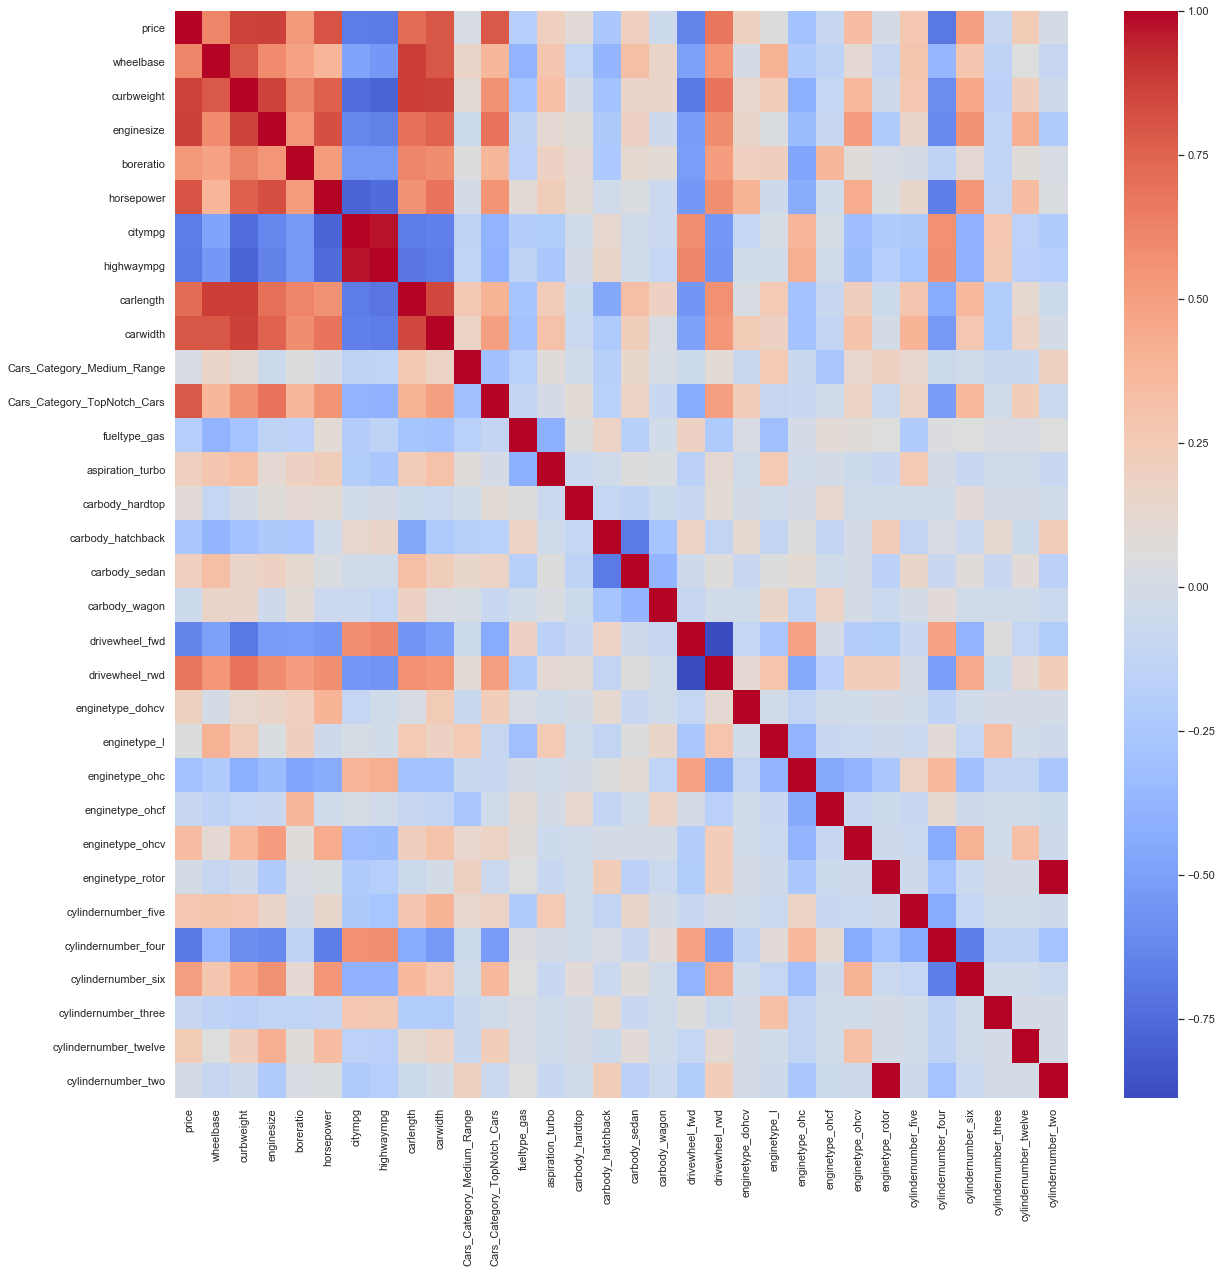

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="coolwarm")
plt.show()

In [43]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

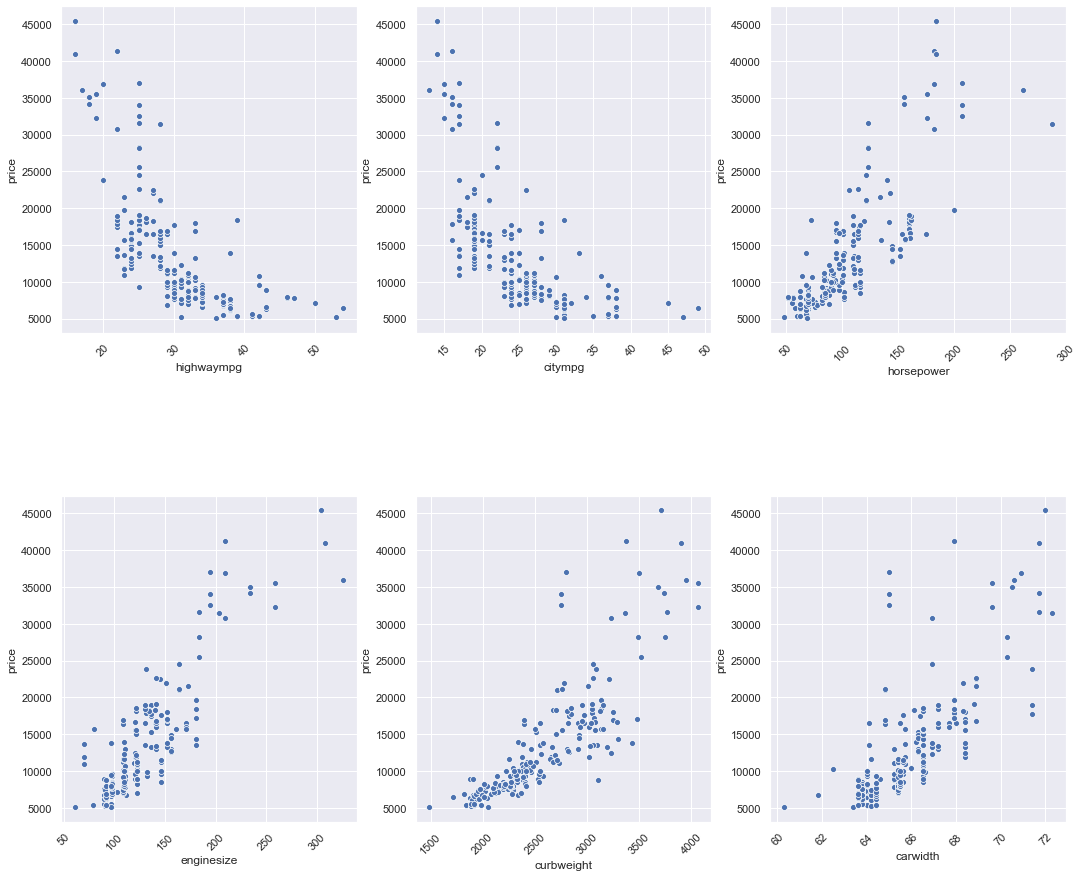

In [44]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [45]:
y_train = df_train.pop('price')
X_train = df_train

<a id="6"></a> <br>
# Step 6: Building a Multiple Linear Regression Model

## Using Recursive Feature Elimination

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 14)]

In [48]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [49]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [50]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           3.41e-68
Time:                        11:03:46   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=11−𝑅𝑖2 ¶

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.9200
6,carbody_sedan,9.7300
0,curbweight,9.0600
2,carwidth,6.2400
5,carbody_hatchback,6.1500
9,enginetype_ohc,5.9700
1,horsepower,5.6100
13,cylindernumber_six,4.7300
7,carbody_wagon,3.4800
11,cylindernumber_five,2.8200


### Dropping cylindernumber_twelve beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

In [52]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.16e-69
Time:                        11:03:46   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.2700
0,curbweight,9.0600
6,carbody_sedan,9.0500
2,carwidth,6.1500
5,carbody_hatchback,5.9500
9,enginetype_ohc,5.9200
1,horsepower,4.6900
13,cylindernumber_six,3.7000
7,carbody_wagon,3.3100
11,cylindernumber_five,2.6600


### Dropping cylindernumber_six beacuse its p-value is 0.493 and we want p-value less than 0.05 and hence rebuilding the model

In [54]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.29e-70
Time:                        11:03:46   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.9900
0,curbweight,8.5300
2,carwidth,5.7200
9,enginetype_ohc,5.6500
6,carbody_sedan,5.2400
1,horsepower,4.5300
5,carbody_hatchback,3.7600
7,carbody_wagon,2.3600
3,Cars_Category_TopNotch_Cars,2.1300
11,cylindernumber_five,1.9700


### Dropping carbody_hardtop beacuse its p-value is 0.238 and we want p-value less than 0.05 and hence rebuilding the model

In [56]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           6.73e-71
Time:                        11:03:46   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.5100
11,cylindernumber_four,8.0900
2,carwidth,5.6500
8,enginetype_ohc,5.6000
5,carbody_sedan,4.6400
1,horsepower,4.1700
4,carbody_hatchback,3.3100
6,carbody_wagon,2.2200
3,Cars_Category_TopNotch_Cars,2.0800
10,cylindernumber_five,1.9300


### Dropping enginetype_ohc beacuse its p-value is 0.110 and we want p-value less than 0.05 and hence rebuilding the model

In [58]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.81e-71
Time:                        11:03:47   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.2500
10,cylindernumber_four,6.8000
2,carwidth,5.6500
5,carbody_sedan,4.3300
1,horsepower,4.1700
4,carbody_hatchback,3.1000
6,carbody_wagon,2.2000
3,Cars_Category_TopNotch_Cars,1.8300
9,cylindernumber_five,1.6300
7,enginetype_dohcv,1.5700


### Dropping cylindernumber_five beacuse its p-value is 0.104 and we want p-value less than 0.05 and hence rebuilding the model

In [60]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.91e-72
Time:                        11:03:47   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
9,cylindernumber_four,5.7600
2,carwidth,5.0800
1,horsepower,4.1300
5,carbody_sedan,3.5200
4,carbody_hatchback,2.6300
6,carbody_wagon,1.9400
3,Cars_Category_TopNotch_Cars,1.8300
7,enginetype_dohcv,1.5400
8,enginetype_ohcv,1.4300


### Dropping enginetype_ohcv beacuse its p-value is 0.180 and we want p-value less than 0.05 and hence rebuilding the model

In [62]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           8.26e-73
Time:                        11:03:47   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
8,cylindernumber_four,5.6600
2,carwidth,5.0800
1,horsepower,3.8100
5,carbody_sedan,3.3500
4,carbody_hatchback,2.4700
6,carbody_wagon,1.8900
3,Cars_Category_TopNotch_Cars,1.8100
7,enginetype_dohcv,1.4900


### Dropping curbweight beacuse its VIF is 8.1 and we want VIF less than 5 and hence rebuilding the model

In [64]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.86e-71
Time:                        11:03:47   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.6600
4,carbody_sedan,3.3500
0,horsepower,2.7200
3,carbody_hatchback,2.4000
1,carwidth,2.2200
2,Cars_Category_TopNotch_Cars,1.7300
5,carbody_wagon,1.7100
6,enginetype_dohcv,1.2400


### Dropping cylindernumber_four beacuse its VIF is 5.66 and we want VIF less than 5 and hence rebuilding the model

In [66]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.70e-70
Time:                        11:03:47   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4500
1,carwidth,2.1200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2200
6,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
5,carbody_wagon,1.0200


<a id="7"></a> <br>
# Step 7: Assumption Testing

<a id="10"></a> <br>
## I) Test of Normality of Residuals

### Histogram Plot and Anderson Darling Test

In [68]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [69]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
   
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 1: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test (below 0.05 generally means non-normal) :', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'],bins=20)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 1: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test (below 0.05 generally means non-normal) : 0.003280088073501484
Residuals are not normally distributed


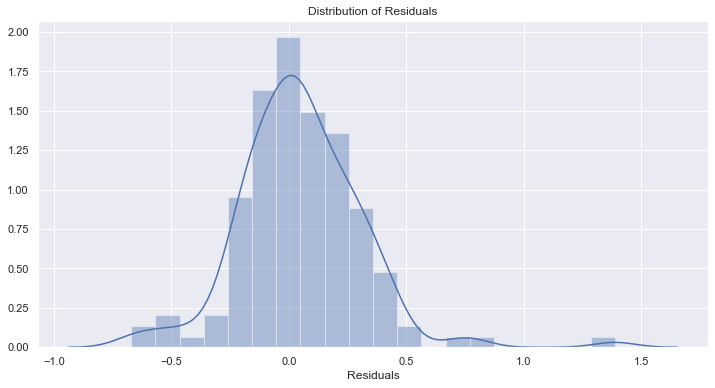


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [70]:
normal_errors_assumption(lm_rfe8,X_train_rfe8c,y_train)

### Shapiro-Wilk Test

In [71]:
df_results = calculate_residuals(lm_rfe8,X_train_rfe8c,y_train)
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df_results['Residuals'])
print("SHAPIRO-WILK TEST")
print('Statistic = ',stat,'\np-value = ', p)
if p>0.05: print('Probably Normal')
else: print('Probably Not Normal')

SHAPIRO-WILK TEST
Statistic =  0.9400341510772705 
p-value =  8.515859008184634e-06
Probably Not Normal


### Q-Q Plot

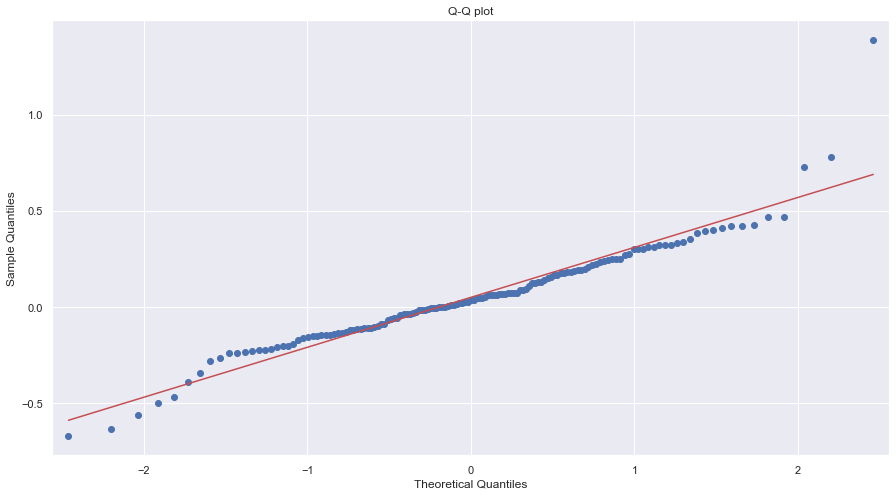

In [72]:
## Q-Q PLOT
from scipy import stats

sm.ProbPlot(df_results['Residuals']).qqplot(line='s');
plt.title('Q-Q plot');

### JB, SW, AD and KS Test 

In [73]:
from scipy import stats

def normality_of_residuals_test(model):
    
    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lm_rfe8)

Jarque-Bera test ---- statistic: 127.7461, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9333, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.2955, p-value: 0.0000
Anderson-Darling test ---- statistic: 1.6549, 5% critical value: 0.7660
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


<a id="11"></a> <br>
## II) Homoscadasticity of Residuals

### Residual Plot

In [74]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 2: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 2: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


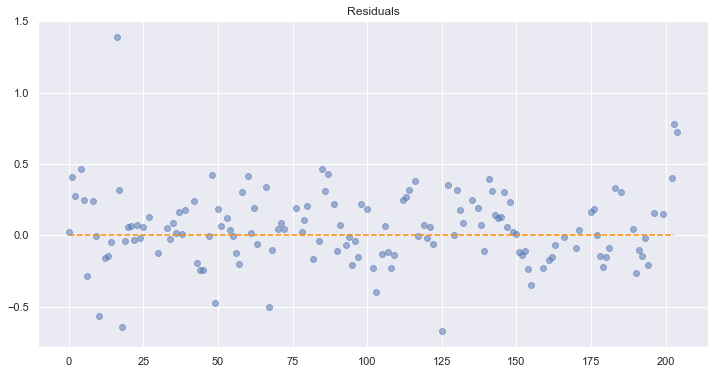

In [75]:
homoscedasticity_assumption(lm_rfe8,X_train_rfe8c,y_train)

### Breusch-Pagan test

In [76]:
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
print("Bresuch-Pagan test")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lm_rfe8.resid, X_train_rfe8c)

lzip(names, test)

Bresuch-Pagan test


[('Lagrange multiplier statistic', 13.606008950370848),
 ('p-value', 0.05864934111503603),
 ('f-value', 2.0279272557956673),
 ('f p-value', 0.05592310858308189)]

The results indicate that the assumption is satisfied and we fail to reject the null hypothesis of homoscedasticity.

### White test

In [77]:
#perform White test
print("White test")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_white(lm_rfe8.resid, X_train_rfe8c)

lzip(names, test)

White test


[('Lagrange multiplier statistic', 36.4715169344244),
 ('p-value', 0.01934259857969008),
 ('f-value', 1.9726687271890582),
 ('f p-value', 0.01183965059476854)]

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.

<a id="12"></a> <br>
## III) Test of Linearity

### Scatter plot 

In [78]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 3: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 3: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


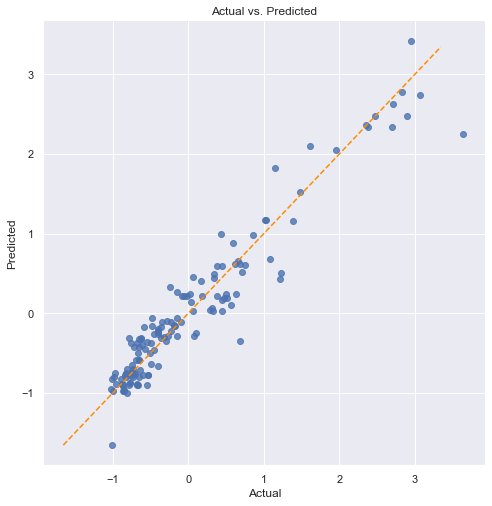

In [79]:
linear_assumption(lm_rfe8,X_train_rfe8c,y_train)

### Ramsey Reset Test

In [80]:
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg

reset = dg.linear_reset(lm_rfe8, power = 2, test_type='exog', use_f = True)

print("Ramsey Reset test: f stat:", np.round(reset.fvalue,6))
print("Ramsey Reset test: p value:", np.round(reset.pvalue,6))


Ramsey Reset test: f stat: [[2.653512]]
Ramsey Reset test: p value: 0.07413


p>0.05. Hence no non-linearity present.

<a id="13"></a> <br>
## IV) Multicollinearity

### VIF Test

In [81]:
print('Assumption 4: Little to no multicollinearity among predictors')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Assumption 4: Little to no multicollinearity among predictors


,Features,VIF
0,horsepower,2.4500
1,carwidth,2.1200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2200
6,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
5,carbody_wagon,1.0200


### HeatMap 

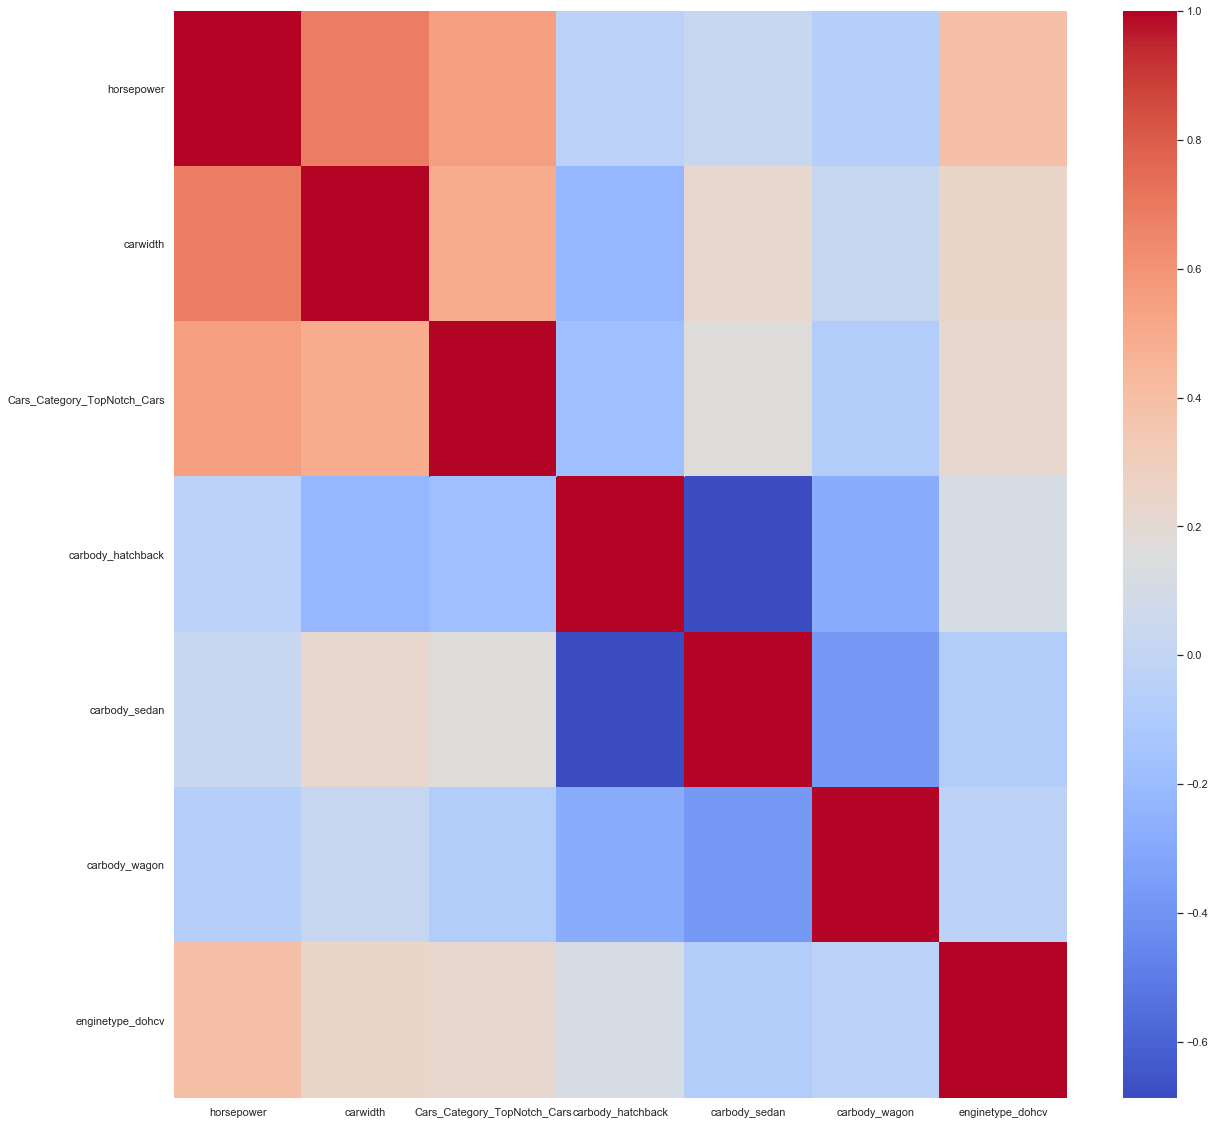

In [82]:
# Heat Map
plt.figure(figsize = (20, 20))
sns.heatmap(X_train_rfe8.corr(), cmap="coolwarm")
plt.show()

### Correlation Matrix

In [83]:
## Regressor Correlation Matrix 
corr = X_train_rfe8.corr() 
corr

,horsepower,carwidth,Cars_Category_TopNotch_Cars,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv
horsepower,1.0000,0.6851,0.5544,-0.0354,0.0267,-0.0632,0.3932
carwidth,0.6851,1.0000,0.4967,-0.2241,0.2227,0.0191,0.2457
Cars_Category_TopNotch_Cars,0.5544,0.4967,1.0000,-0.1741,0.1694,-0.0801,0.2285
carbody_hatchback,-0.0354,-0.2241,-0.1741,1.0000,-0.6875,-0.2826,0.1162
carbody_sedan,0.0267,0.2227,0.1694,-0.6875,1.0000,-0.3727,-0.0799
carbody_wagon,-0.0632,0.0191,-0.0801,-0.2826,-0.3727,1.0000,-0.0328
enginetype_dohcv,0.3932,0.2457,0.2285,0.1162,-0.0799,-0.0328,1.0000


Assupmtion 4 satisfied.

<a id="8"></a> <br>
# Step 8: Making Predictions Using the Final Model

In [84]:
# Applying the scaling on the test set
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

In [85]:
# Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test
print(X_test)

     wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
160 -0.4752    -0.8209     -0.6602     -0.4514    -0.8224     1.8879     
186 -0.2059    -0.4874     -0.3908     -0.4514    -0.4434     0.2408     
59  0.0466     -0.2847     -0.0724     0.3175     -0.4687     0.0911     
165 -0.6772    -0.5058     -0.6602     -0.2592    0.2387      0.0911     
140 -0.8792    -0.5518     -0.4153     1.2019     -0.7466     0.0911     
..      ...        ...         ...        ...         ...        ...     
28  0.8041     -0.0083     -0.0724     0.1253     -0.3676     -0.2084    
29  -0.4415    0.5002      0.7603      1.1250     1.0724      -0.9570    
182 -0.2059    -0.5132     -0.6847     -1.1435    -1.2771     1.7382     
40  -0.3405    -0.3086     -0.3663     -0.6052    -0.4182     0.2408     
128 -1.5188    0.4800      1.6909      1.6633     2.6387      -1.2565    

     highwaympg  carlength  carwidth  Cars_Category_Medium_Range  \
160 2.3205      -0.5669    -0.6526    0    

In [86]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

In [87]:
X_test_2 = X_test_1[X_train_rfe8c.columns]

In [88]:
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

<a id="9"></a> <br>
# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred2')

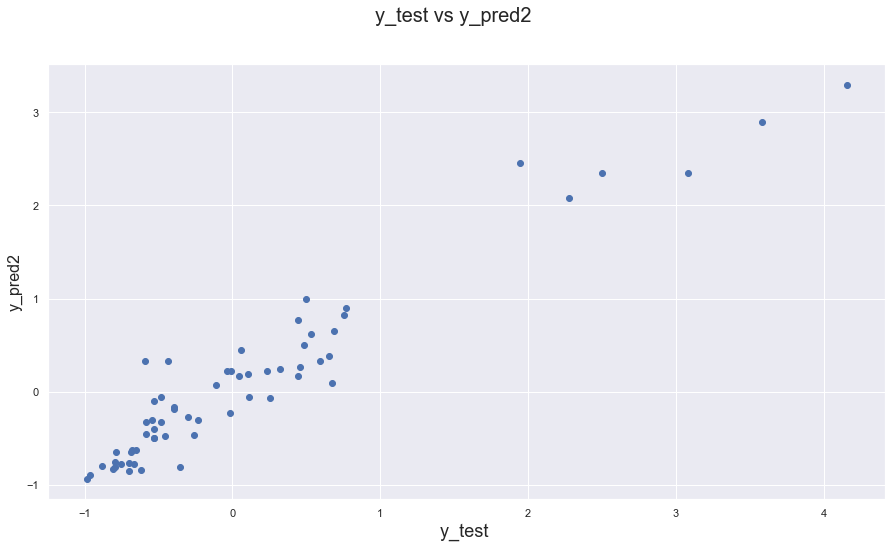

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)    

In [90]:
r2_score(y_test, y_pred2)

0.9153853722866511

**The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
- carbody_sedan                  
- carbody_wagon    

#### Equation of Line to predict the Car prices values
𝐶𝑎𝑟𝑝𝑟𝑖𝑐𝑒=0.2440+0.3599×ℎ𝑜𝑟𝑠𝑒𝑝𝑜𝑤𝑒𝑟+0.3652×𝑐𝑎𝑟𝑤𝑖𝑑𝑡ℎ+1.2895×𝐶𝑎𝑟𝑠𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦𝑡𝑜𝑝𝑛𝑜𝑡𝑐ℎ𝑐𝑎𝑟𝑠−0.4859×𝑐𝑎𝑟𝑏𝑜𝑑𝑦ℎ𝑎𝑡𝑐ℎ𝑏𝑎𝑐𝑘−1.4450×𝑒𝑛𝑔𝑖𝑛𝑒𝑡𝑦𝑝𝑒𝑑𝑜ℎ𝑐𝑣−0.3518×𝑐𝑎𝑟𝑏𝑜𝑑𝑦𝑠𝑒𝑑𝑎𝑛−0.4023×𝑐𝑎𝑟𝑏𝑜𝑑𝑦𝑤𝑎𝑔𝑜𝑛

**Model Conclusions:**
- R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

### Closing Statement:
- Model is good enough to predict the carprices which explains the variance of data upto 90% and the model is significant.